In [1]:
import pandas as pd 
df=pd.read_csv("CC GENERAL.csv")

In [2]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#using hierarchical clustering 
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True )
df['MINIMUM_PAYMENTS'].isnull().sum()

0

In [5]:
df['CREDIT_LIMIT'].mean()


4494.449450364621

In [6]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True )
df['CREDIT_LIMIT'].isnull().sum()

0

In [7]:
df=df.drop("CUST_ID",axis=1 )

In [8]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
#clustering our data 
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
clust_labels=model.fit_predict(df)


In [10]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.value_counts()

0    8920
2      20
1       7
4       2
3       1
dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
standarized=scaler.fit_transform(df)

In [12]:
model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
clust_labels2=model.fit_predict(standarized)

In [13]:
agglomerative=pd.DataFrame(clust_labels2)
agglomerative.value_counts()

1    8892
4      27
0      23
3       7
2       1
dtype: int64

In [14]:
#scalling and normalizing the data 

from sklearn.preprocessing import normalize 

from scipy.stats import zscore 
df_scaled=df.apply(zscore)
df_scaled=normalize(df_scaled)
normalized =pd.DataFrame(df_scaled,columns=df.columns)


In [15]:
model=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="complete")
clust_labels3=model.fit_predict(normalized)
normalized['Agglo_clusters_labels']=clust_labels3

In [16]:
print("Agglomerative labels with standarization")
normalized['Agglo_clusters_labels'].value_counts()

Agglomerative labels with standarization


0    3424
1    2397
4    1387
2     873
3     869
Name: Agglo_clusters_labels, dtype: int64

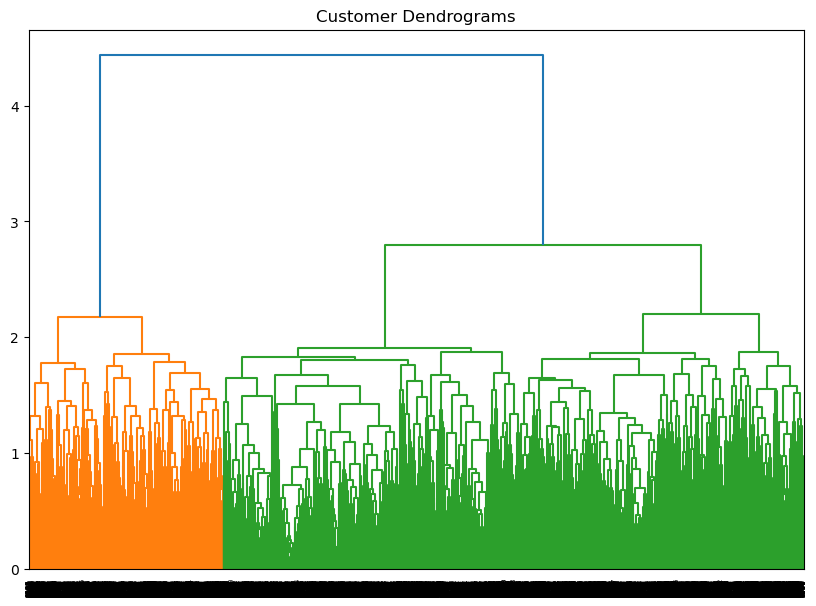

In [17]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(normalized, method="complete"))

In [18]:
from sklearn.cluster import KMeans #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0) #Cluster our data by choosing 5 as number of clusters
kmeans.fit(normalized)


KMeans(n_clusters=5, random_state=0)

In [19]:
labels=pd.DataFrame(kmeans.labels_)
normalized['k_means_labels']=labels
normalized['k_means_labels'].value_counts()

1    3388
2    2431
4    1387
3     875
0     869
Name: k_means_labels, dtype: int64